In [ ]:
from PIL import Image
import os

def rgba_to_rgb(image_path):
    rgba_image = Image.open("E:\\machine learning project\\PetImages")
    rgb_image = rgba_image.convert('RGB')
    return rgb_image

def convert_images_in_directory(input_dir, output_dir):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Get a list of all files in the input directory
    file_list = os.listdir(input_dir)
    
    # Loop over each file in the input directory
    for filename in file_list:
        if filename.endswith('.png') or filename.endswith('.jpg'):
            # Construct full paths for input and output files
            input_file_path = os.path.join(input_dir, filename)
            output_file_path = os.path.join(output_dir, filename)
            
            # Convert RGBA to RGB and save the image
            rgb_image = rgba_to_rgb(input_file_path)
            rgb_image.save(output_file_path)

# Example usage
input_directory = 'E:\\machine learning project\\PetImages'
output_directory = 'E:\\machine learning project\\PetImage'
convert_images_in_directory(input_directory, output_directory)


In [ ]:
from PIL import Image
import os

def rgba_to_rgb(image_path):
    rgba_image = Image.open("E:\\machine learning project\\PetImages")
    rgb_image = rgba_image.convert('RGB')
    return rgb_image

def convert_images_in_directory(input_dir, output_dir):
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Get a list of all files in the input directory
    file_list = os.listdir(input_dir)
    
    # Loop over each file in the input directory
    for filename in file_list:
        if filename.endswith('.png') or filename.endswith('.jpg'):
            # Construct full paths for input and output files
            input_file_path = os.path.join(input_dir, filename)
            output_file_path = os.path.join(output_dir, filename)
            
            # Convert RGBA to RGB and save the image
            rgb_image = rgba_to_rgb(input_file_path)
            rgb_image.save(output_file_path)

# Example usage
input_directory = 'E:\\machine learning project\\PetImages'
output_directory = 'E:\\machine learning project\\PetImage'
convert_images_in_directory(input_directory, output_directory)


In [18]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pda
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os

In [5]:
path = "E:\\machine learning project\\PetImage"
classes = os.listdir(path)
classes

['Cat', 'Dog']

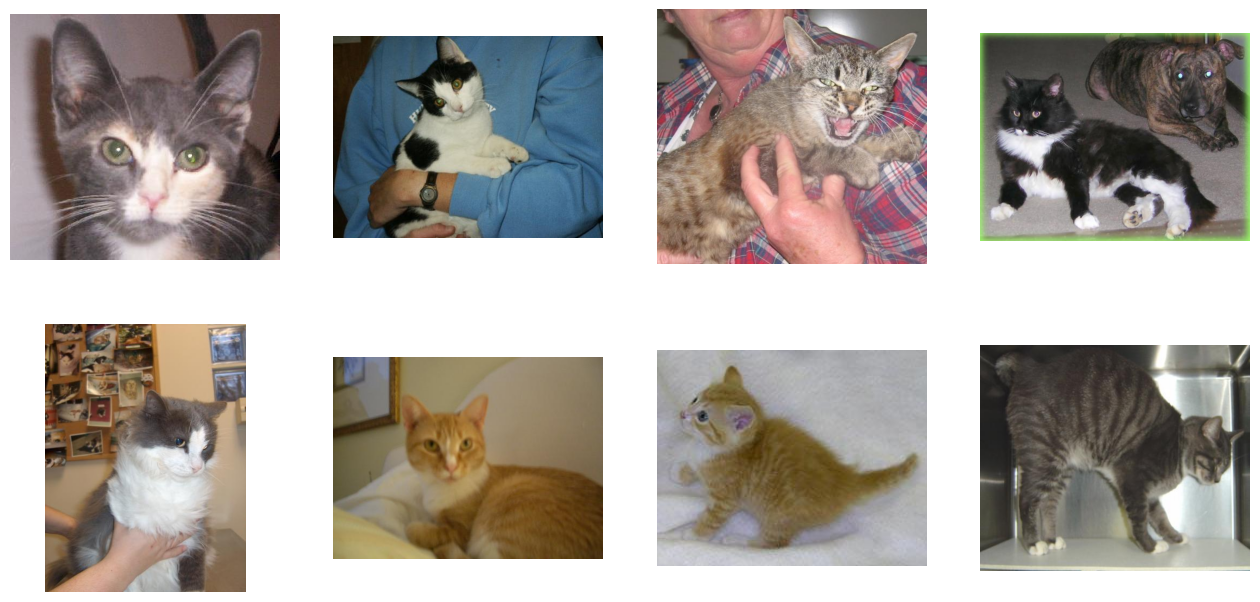

In [6]:
import matplotlib.image as mpimg

fig = plt.gcf()
fig.set_size_inches(16,16)
cat_dir = os.path.join("E:\\machine learning project\\PetImage\\Cat")
dog_dir = os.path.join("E:\\machine learning project\\PetImage\\Dog")
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210 

cat_images = [os.path.join(cat_dir,fname)
             for fname in cat_names[pic_index-8:pic_index]]

dog_images = [os.path.join(dog_dir,fname)
             for fname in dog_names[pic_index*8:pic_index]]

for i, img_path in enumerate(cat_images+dog_images):
    sp = plt.subplot(4,4,i+1)
    sp.axis("off")
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

In [7]:
train_datagen = image_dataset_from_directory(path, image_size=(200,200),
                                             subset="training",seed=1,validation_split=0.1,batch_size=32)
test_datagen = image_dataset_from_directory(path, image_size=(200,200),
                                             subset="validation",seed=1,validation_split=0.1,batch_size=32)

Found 24998 files belonging to 2 classes.
Using 22499 files for training.
Found 24998 files belonging to 2 classes.
Using 2499 files for validation.


In [8]:
model = tf.keras.models.Sequential([
    layers.Conv2D(32, (3, 3), activation="relu", input_shape=(200, 200, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(512, activation="relu"),
    layers.BatchNormalization(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.1),
    layers.BatchNormalization(),
    layers.Dense(1, activation="sigmoid")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [6]:
tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [10]:
history = model.fit(train_datagen,epochs=10,validation_data=test_datagen)

Epoch 1/10
704/704 [==============================] - 881s 1s/step - loss: 0.6913 - accuracy: 0.6053 - val_loss: 0.8047 - val_accuracy: 0.5530
Epoch 2/10
704/704 [==============================] - 786s 1s/step - loss: 0.6642 - accuracy: 0.6127 - val_loss: 0.6421 - val_accuracy: 0.6487
Epoch 3/10
704/704 [==============================] - 716s 1s/step - loss: 0.6045 - accuracy: 0.6746 - val_loss: 1.0302 - val_accuracy: 0.5942
Epoch 4/10
704/704 [==============================] - 704s 1000ms/step - loss: 0.5123 - accuracy: 0.7486 - val_loss: 0.5327 - val_accuracy: 0.7255
Epoch 5/10
704/704 [==============================] - 713s 1s/step - loss: 0.5390 - accuracy: 0.7213 - val_loss: 0.6887 - val_accuracy: 0.6283
Epoch 6/10
704/704 [==============================] - 707s 1s/step - loss: 0.5657 - accuracy: 0.7075 - val_loss: 0.4991 - val_accuracy: 0.7551
Epoch 7/10
704/704 [==============================] - 704s 999ms/step - loss: 0.5502 - accuracy: 0.7213 - val_loss: 0.8541 - val_accuracy:

In [9]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

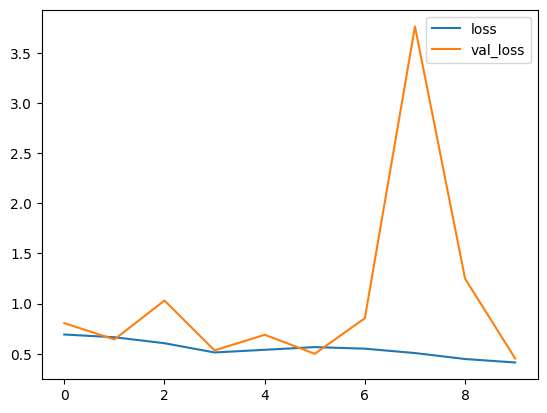

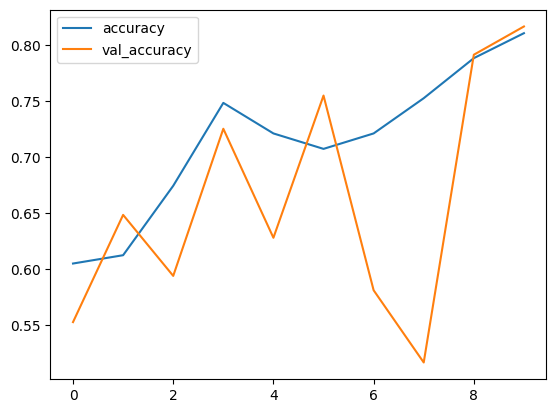

In [12]:
history_df = pd.DataFrame(history.history) 
history_df.loc[:, ['loss', 'val_loss']].plot() 
history_df.loc[:, ['accuracy', 'val_accuracy']].plot() 
plt.show() 


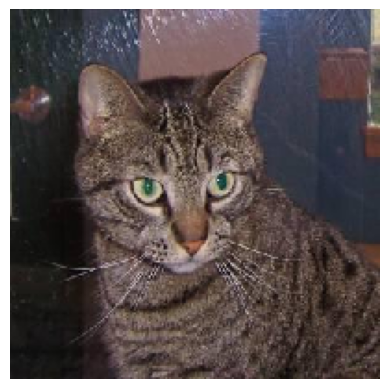

1/1 [==============================] - 1s 838ms/step
Cat


In [17]:
from keras.preprocessing import image 
from tensorflow.keras.preprocessing import image
#Input image 
test_image_path = 'E:\\machine learning project\\PetImage\\Cat\\1.jpg'
test_image = image.load_img(test_image_path, target_size=(200, 200)) 

plt.imshow(test_image)
plt.axis('off')  # Hide the axes
plt.show()

test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image, axis=0) 
test_image /= 255.0  # Normalize the image

result = model.predict(test_image)

if result >= 0.5: 
    print("Dog")
else: 
    print("Cat")
